In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')
pd.options.display.float_format = '{:,.0f}'.format



In [220]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [222]:
df = df.rename(columns={"listed_in":"genre"})
df['genre'] = df['genre'].apply(lambda x: x.split(",")[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...


In [223]:
df["date_added"] = df["date_added"].str.strip()

# convert dtype to datetime 
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month



In [224]:
# Finding seasons from durations  
df['season_count'] = df.apply(  
    lambda x: str(x['duration']).split(" ")[0] if isinstance(x['duration'], str) and "Season" in x['duration'] else "",   
    axis=1  
)
df['duration'] = df.apply(  
    lambda x: str(x['duration']).split(" ")[0] if isinstance(x['duration'], str) and "Season" not in x['duration'] else "",   
    axis=1  
)  



In [225]:
# Check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
genre              0
description        0
year_added        10
month_added       10
season_count       0
dtype: int64

###Dealing with missing data

In [226]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [227]:
df['cast'].replace(np.nan, 'No Data',inplace  = True)


C:\Users\HFCS\AppData\Local\Temp\ipykernel_5832\3926711074.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [228]:
df['director'].replace(np.nan, 'No Data',inplace  = True)

C:\Users\HFCS\AppData\Local\Temp\ipykernel_5832\3206582273.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [229]:
# Drops
df.dropna(inplace=True)

In [230]:
# Drop Duplicates

df.drop_duplicates(inplace= True)

In [231]:

df.describe()

,date_added,release_year,year_added,month_added
count,8793,"8,793","8,793","8,793"
mean,2019-05-17 14:13:03.623336704,"2,014","2,019",7
min,2008-01-01 00:00:00,"1,925","2,008",1
25%,2018-04-06 00:00:00,"2,013","2,018",4
50%,2019-07-02 00:00:00,"2,017","2,019",7
75%,2020-08-19 00:00:00,"2,019","2,020",10
max,2021-09-25 00:00:00,"2,021","2,021",12
std,NaN,9,2,3


In [232]:
df.describe(include='O')

,show_id,type,title,director,cast,country,rating,duration,genre,description,season_count
count,8793,8793,8793,8793,8793,8793,8793,8793,8793,8793,8793
unique,8793,2,8793,4528,7680,748,17,206,36,8761,16
top,s1,Movie,Dick Johnson Is Dead,No Data,No Data,United States,TV-MA,,Dramas,"Paranormal activity at a lush, abandoned prope...",
freq,1,6129,1,2621,825,3641,3205,2667,1599,4,6129


In [233]:
for column in df.columns:
    unique_values = df[column].nunique()
    print( column, ": ", unique_values)

show_id :  8793
type :  2
title :  8793
director :  4528
cast :  7680
country :  748
date_added :  1713
release_year :  74
rating :  17
duration :  206
genre :  36
description :  8761
year_added :  14
month_added :  12
season_count :  16


In [234]:
#Saving modified data
df.to_csv('modi_netflix_titles.csv')

##Categorical Columns

In [235]:
cat_cols = ['type', 'country', 'rating', 'genre']
cat_cols

['type', 'country', 'rating', 'genre']

In [236]:
def univariate_categorical2(df, col):
    # Get the counts of all categories
    counts = df[col].apply(lambda x: x.split(",")[0]).value_counts()

    # Get the top 4 categories
    top_4_counts = counts.nlargest(3)
    top_4_categories = top_4_counts.index

    # Calculate the 'Other' category count
    other_count = counts[~counts.index.isin(top_4_categories)].sum()

    # Create a new Series for the pie chart data
    if other_count > 0:
        pie_data = pd.concat([top_4_counts, pd.Series({'Other': other_count})])
    else:
        pie_data = top_4_counts

    # Filter the DataFrame to include only the top 10 categories
    top_10_counts = counts.nlargest(10)

    # Create a figure with 1 row and 2 columns for subplots
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))

    # Count plot using Seaborn for the top 10 categories
    sns.barplot(top_10_counts, orient='h', ax=axes[0])
    axes[0].set_title(f'Countplot (All or Top 10)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

    # Pie chart using Matplotlib for the top 4 categories + 'Other'
    axes[1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
    axes[1].set_title(f'Pie Chart of Top 4 {col} + Other')

    # Set the overall title for the figure
    fig.suptitle(f'Top Categories of {col}\n {len(counts)} categories', fontsize=14)

    # Adjust layout to make room for the title
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plot
    plt.show()

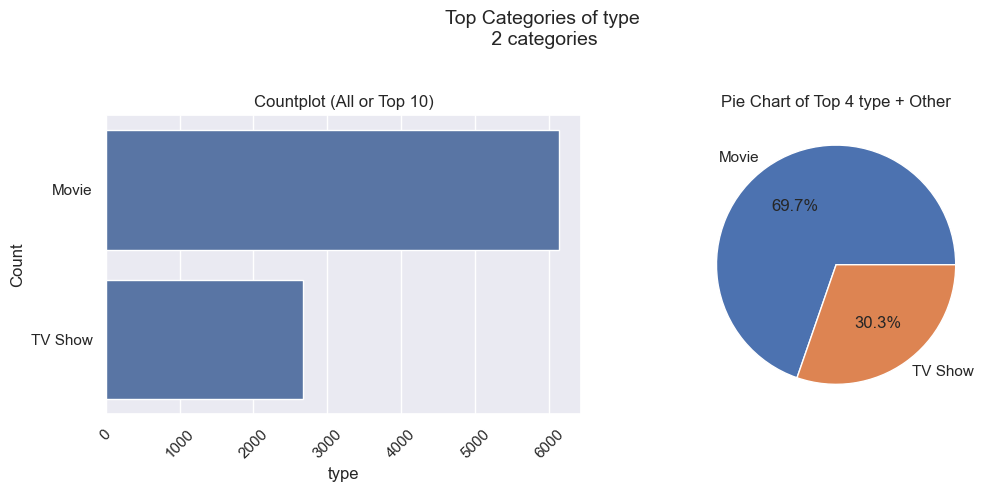

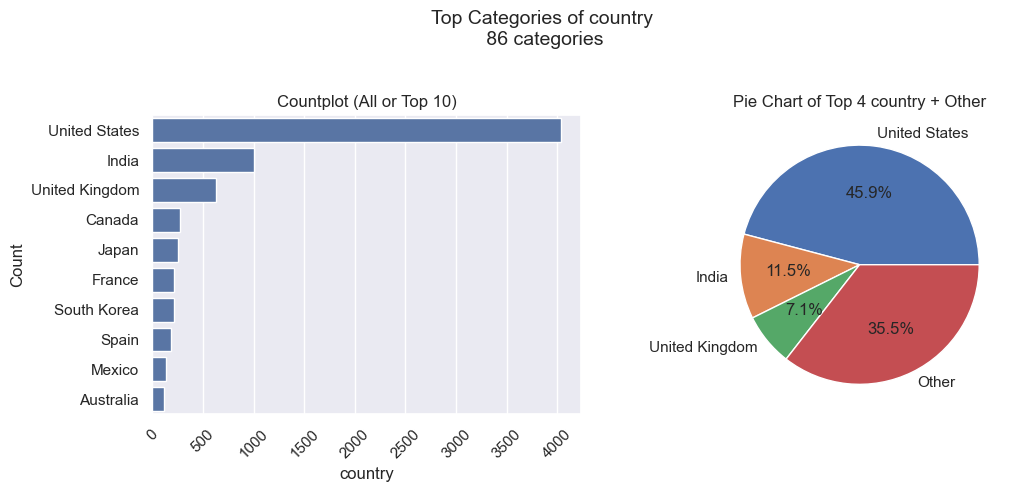

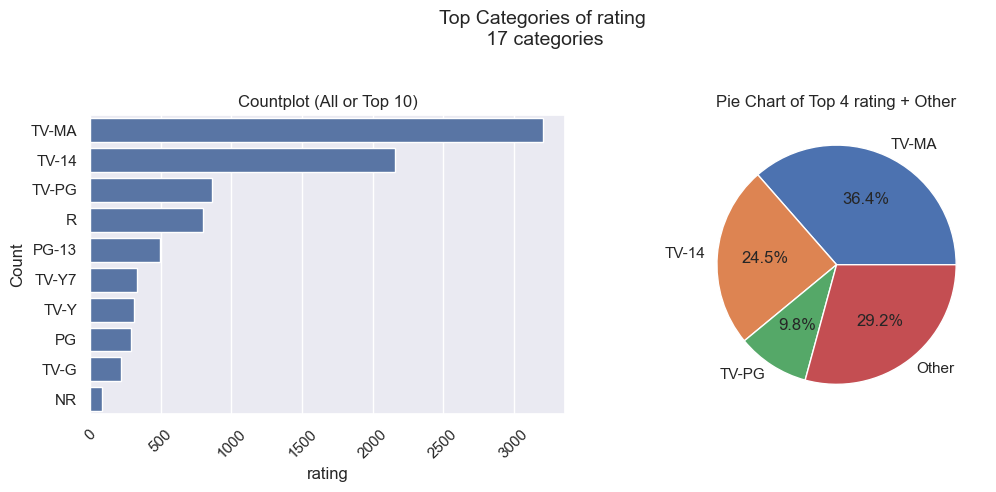

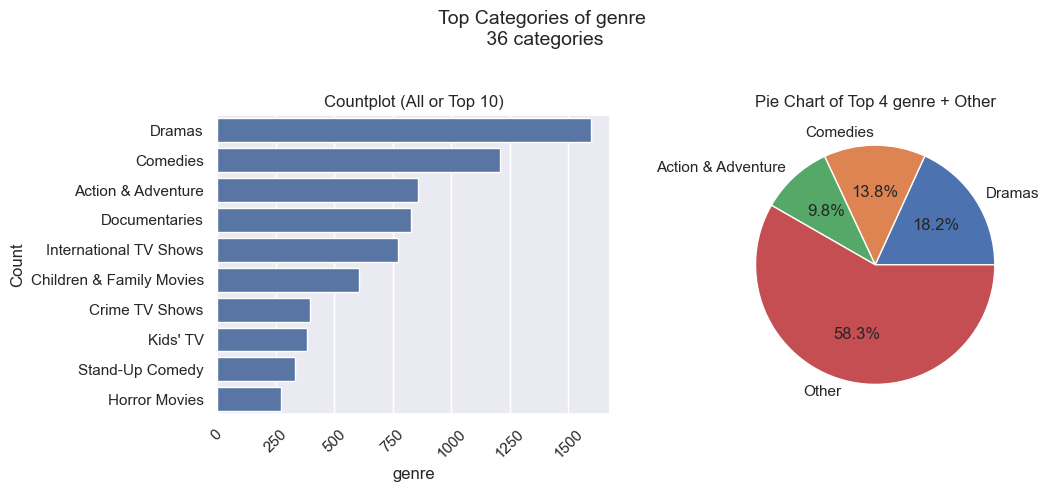

In [237]:
for cat_col in cat_cols:
    univariate_categorical2(df, cat_col)

##Directors Column

In [238]:
directors = df['director'].value_counts()
given_directors = directors.sum() - directors[0]
print(f'given directors = {given_directors}')
directors = df.groupby(['director'])['director'].value_counts().sort_values(ascending=False).reset_index().head(15)
directors = directors.drop(index=0).reset_index(drop=True)
directors

given directors = 6172


C:\Users\HFCS\AppData\Local\Temp\ipykernel_5832\747347622.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Youssef Chahine,12
7,Jay Chapman,12
8,Martin Scorsese,12
9,Steven Spielberg,11


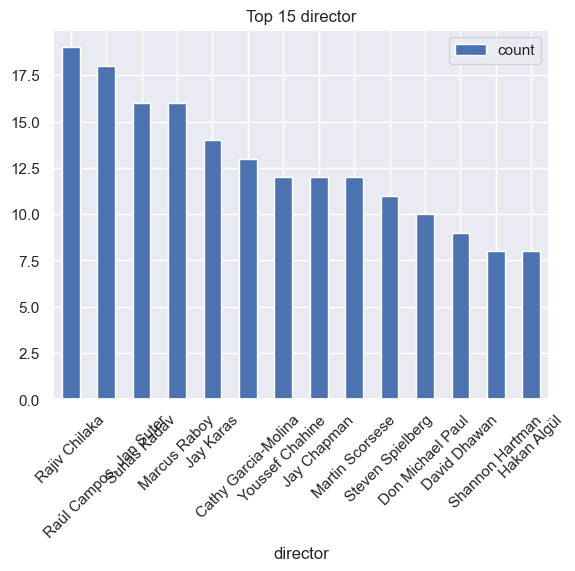

In [239]:
directors.plot(x='director', y='count', kind='bar')
plt.title('Top 15 director')
plt.xticks(rotation=45)
plt.show()

##Country Column

In [240]:
counts_country = df['country'].apply(lambda x: x.split(",")[0]).value_counts().reset_index()
counts_country

,country,count
0,United States,4034
1,India,1008
2,United Kingdom,627
3,Canada,271
4,Japan,257
...,...,...
81,Namibia,1
82,Senegal,1
83,Luxembourg,1
84,Syria,1


In [241]:
fig = px.choropleth(counts_country, locations='country',  locationmode='country names', hover_name='country', color='count',
               color_continuous_scale='Greens', width=1200, height=500,labels={'count':'Count'})
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='natural earth'))
fig.show()

                Movie  TV Show  total_by_country
country                                         
United States   2,803    1,231             4,034
India             927       81             1,008
United Kingdom    382      245               627
Canada            187       84               271
Japan              85      172               257
France            148       64               212
South Korea        47      164               211
Spain             129       52               181
Mexico             86       48               134
Australia          61       54               115


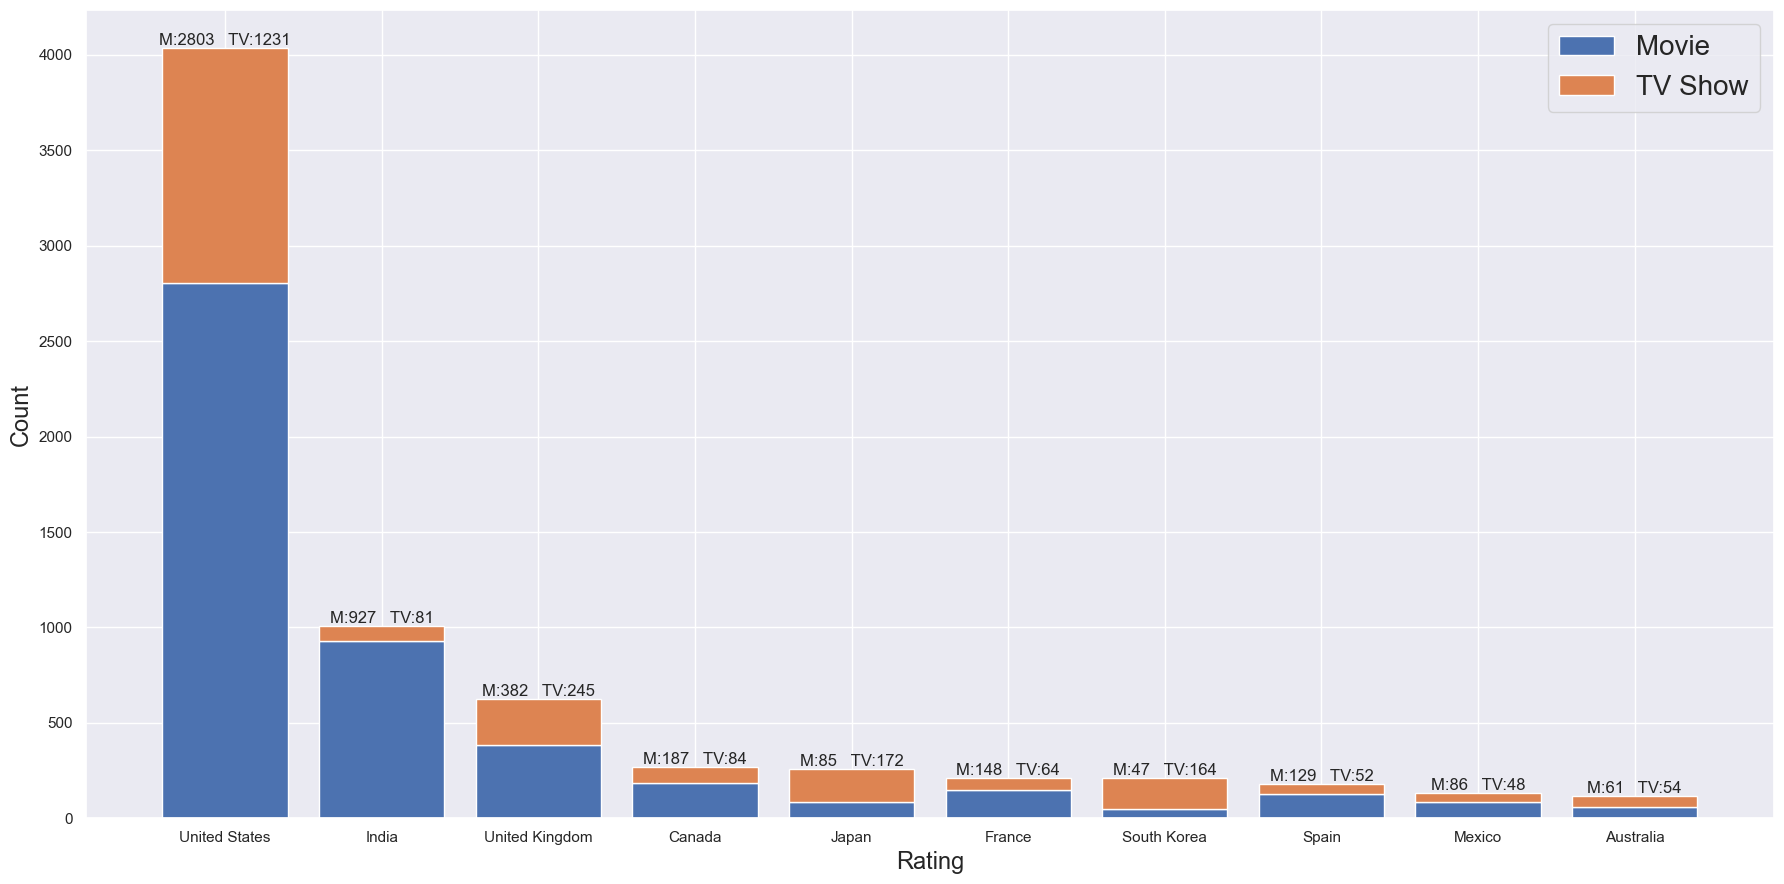

In [242]:
# Count movies and TV shows per country
movie_counts_country = df[df['type'] == 'Movie']['country'].apply(lambda x: x.split(",")[0]).value_counts()
tv_show_counts_country = df[df['type'] == 'TV Show']['country'].apply(lambda x: x.split(",")[0]).value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_country, 'TV Show': tv_show_counts_country})
df_counts['total_by_country'] = df_counts.sum(axis=1)

# Sort by total count in descending order and select top 10
top_10_counts = df_counts.sort_values(by='total_by_country', ascending=False).head(10)

# Print the top 10 countries with movie, TV show, and total counts
print(top_10_counts)

# Create dual stacked bar chart
fig, ax = plt.subplots(figsize=(18, 9))
ax.bar(top_10_counts.index, top_10_counts['Movie'], label='Movie')
ax.bar(top_10_counts.index, top_10_counts['TV Show'], bottom=top_10_counts['Movie'], label='TV Show')
# Add total labels on top of each stack
for idx, row in top_10_counts.iterrows():
    total_label = f"{"M:"}{ int(row['Movie'])} {" "} {"TV:"}{int(row['TV Show'])}"
    y_pos = row['Movie'] + row['TV Show']  # Adjust based on bar width
    ax.text(idx, y_pos, total_label, ha='center', va='bottom', fontsize=12)  # Customize label position and size

# Customize chart appearance
ax.set_xlabel('Rating', fontsize = 17)
ax.set_ylabel('Count', fontsize = 17)
ax.legend(loc='upper right', prop={'size': 20})
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()
ax.legend(loc='upper right', prop={'size': 20})



plt.show()


##Release Year Column

C:\Users\HFCS\AppData\Local\Temp\ipykernel_5832\847601595.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




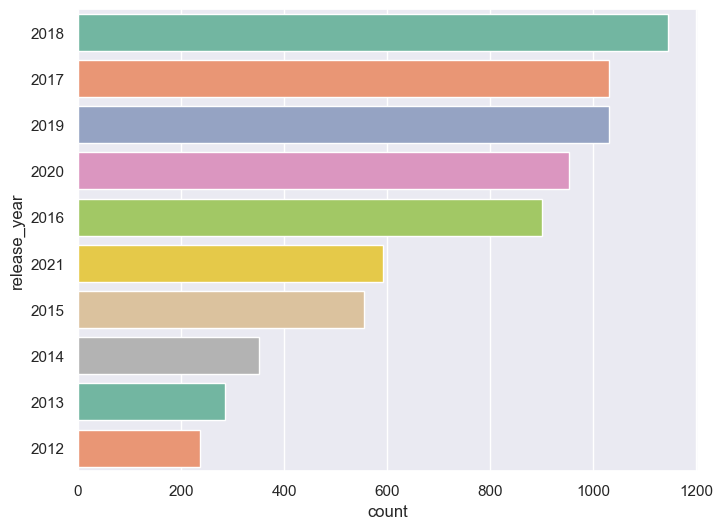

In [243]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df, palette="Set2", order=df['release_year'].value_counts().index[0:10])

In [244]:
df3= df.groupby(['release_year','type'])
df3

In [245]:
mov_counts = df3.size().unstack().fillna(0)
mov_counts

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,1
...,...,...
2017,766,265
2018,767,379
2019,633,397


In [246]:
ind = mov_counts.sum(axis='columns').argsort()


In [247]:
count_subset = mov_counts.take(ind[-15:])
count_subset

type,Movie,TV Show
release_year,,
2006,82,14
2008,113,22
2009,118,34
2011,145,40
2010,154,39
2012,173,63
2013,225,61
2014,264,88
2015,397,159


In [248]:
count_subset = count_subset.stack()
count_subset.name='total'
count_subset = count_subset.reset_index()

In [249]:
count_subset[count_subset['type']==""]['type']='Missing'
#count_subset.head()
count_subset.replace("",'Missing')

,release_year,type,total
0,2006,Movie,82
1,2006,TV Show,14
2,2008,Movie,113
3,2008,TV Show,22
4,2009,Movie,118
5,2009,TV Show,34
6,2011,Movie,145
7,2011,TV Show,40
8,2010,Movie,154
9,2010,TV Show,39


In [250]:
px.scatter(count_subset, x='release_year', y='total', color="type" ,title='Number of movies and TV shows bt year')

##Rating Column

In [251]:
df['count'] = 1
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

C:\Users\HFCS\AppData\Local\Temp\ipykernel_5832\3272721644.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



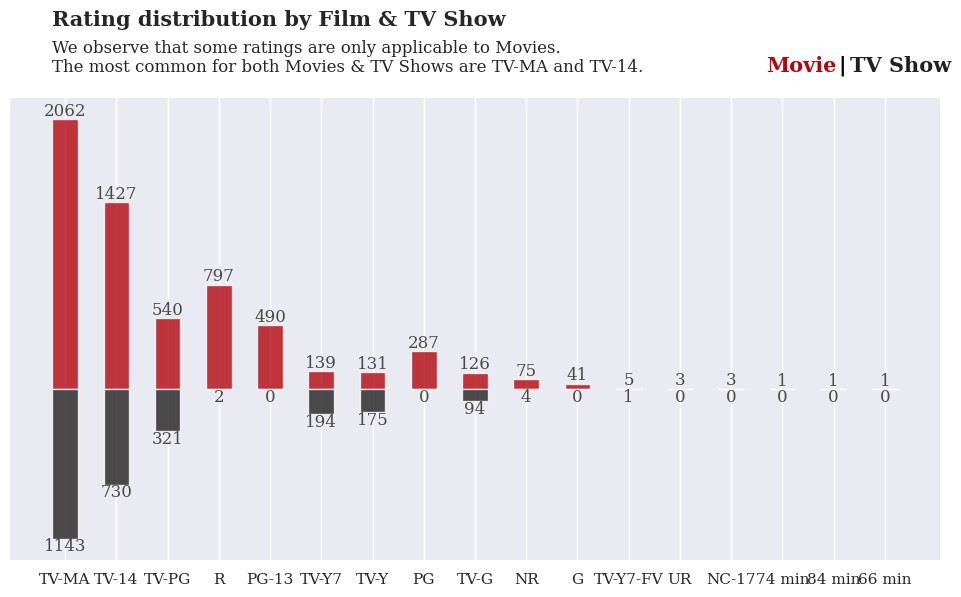

In [252]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')


# Annotations
for i in tv.index:
     ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])
ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''
, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()    

##Title Column

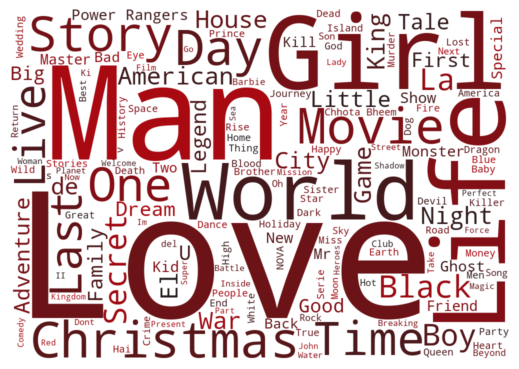

In [253]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')



wordcloud = WordCloud(background_color = 'white', width = 1000,  height = 700,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

###Description Column

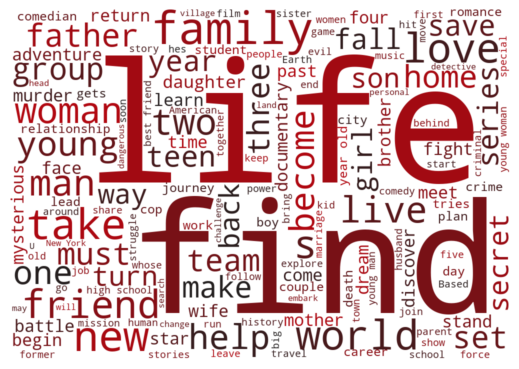

In [254]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')



wordcloud = WordCloud(background_color = 'white', width = 1000,  height = 700,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

###Duration Column

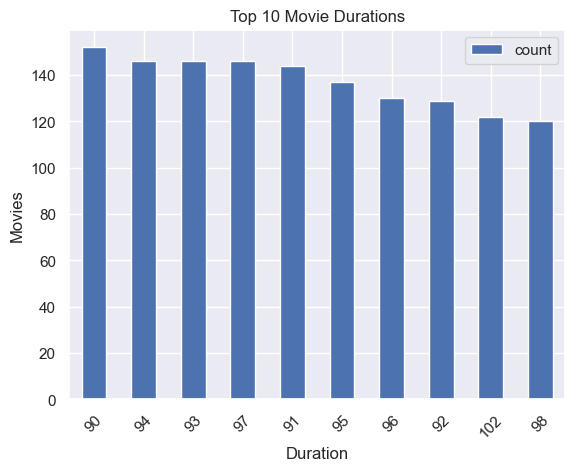

In [255]:
durations = df.groupby(['duration', 'type'])['duration'].value_counts().reset_index()
top_10_movie_durations = durations[durations['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_movie_durations.plot(x='duration', y='count', kind='bar')
plt.title('Top 10 Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Movies')
plt.xticks(rotation=45)
plt.show()


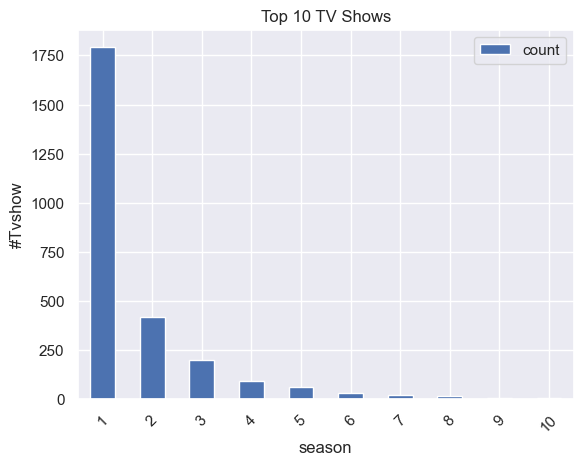

In [256]:
season_counts = df.groupby(['season_count', 'type'])['season_count'].value_counts().reset_index()
top_10_shows_seasons = season_counts[season_counts['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]


top_10_shows_seasons.plot(x='season_count', y='count', kind='bar')
plt.title('Top 10 TV Shows')
plt.xlabel('season')
plt.ylabel('#Tvshow')
plt.xticks(rotation=45)
plt.show()
plt.show()

##Ratigin Per Each genre Type

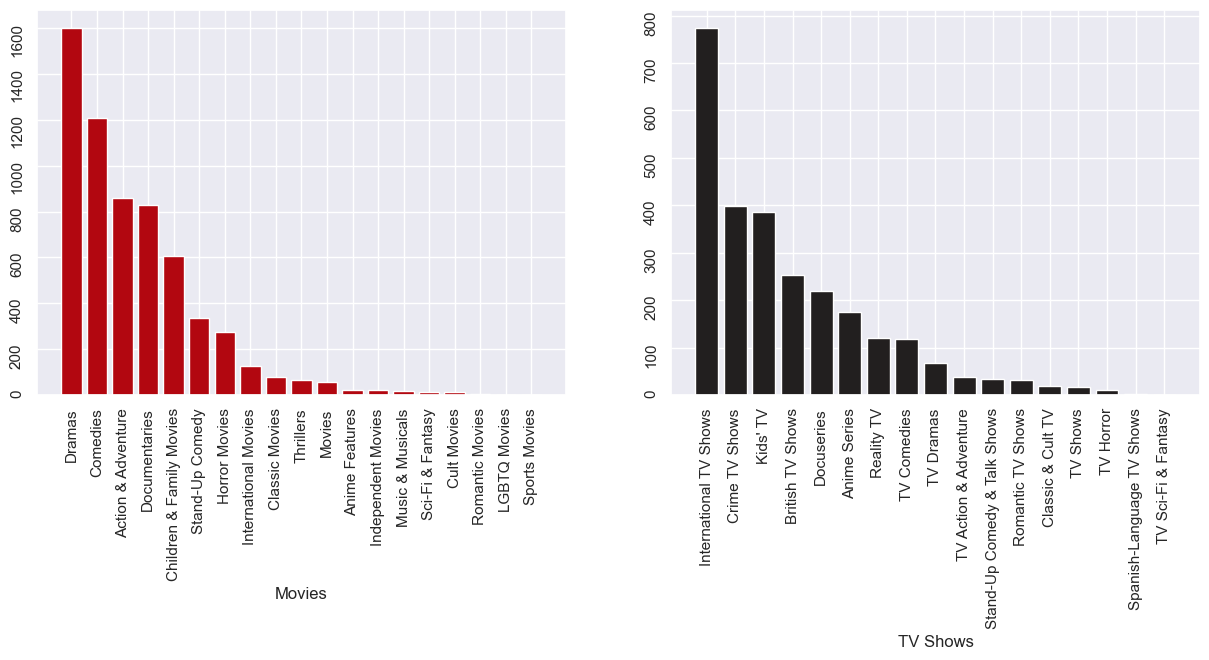

In [257]:
movies = df.loc[df["type"] == "Movie", "genre"].value_counts()
tv_show = df.loc[df["type"] == "TV Show", "genre"].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].bar(x = movies.index, height =movies,color='#b20710')
axs[1].bar(x = tv_show.index, height = tv_show,color='#221f1f')
#plt.xticks(rotation=90) 
axs[0].tick_params(rotation=90)
axs[1].tick_params(rotation=90)
axs[0].set_xlabel('Movies')
axs[1].set_xlabel('TV Shows')

plt.show()

The Number of Movies and TV Shows Added to the Netflix Platform per Each Year

In [258]:
shows_added_via_year = df.groupby(df["year_added"])["type"].count()
fig = px.line(shows_added_via_year, x=shows_added_via_year.index, 
              y=shows_added_via_year, 
              markers=True, line_shape='linear', 
              title='Movies & TV Shows Added via Years',
              width=800,
              height=550,
             labels={"y": "Number of Movies & Tv Shows",
                    "date_added": "Year"})

# Custom Format
fig.update_xaxes(tickvals=shows_added_via_year.index)
fig.update_traces(line=dict(color='darkred'))
fig.update_layout(
    margin=dict(l=40, r=10, t=80, b=20),
)
iplot(fig)